##                                                  --TimeSeries Project--

## Group members: 
###    Shanawaz Kumbari
###    Ankur Anand
###    Dhananjay
    

In [3]:
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import pandas as pd

In [4]:

# Importing the dataset
covid = pd.read_csv(r"C:\Users\emoin\Downloads\covid_19_data.csv")

print(covid.head())


   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1       1/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2       1/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3       1/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4       1/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5       1/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0          1       0          0  
1         14       0          0  
2          6       0          0  
3          1       0          0  
4          0       0          0  


In [5]:
# Data Shape
print("Size /shape of data",covid.shape)
print("Checking Null Values",covid.isnull().sum())
print("Checking type of Data",covid.dtypes)

# Deleting Non-Required Dimension (column  - SNo)

covid.drop(["SNo"],1,inplace=True)

print("Checking Null Values",covid.isnull().sum())

Size /shape of data (38622, 8)
Checking Null Values SNo                    0
ObservationDate        0
Province/State     17507
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking type of Data SNo                 int64
ObservationDate    object
Province/State     object
Country/Region     object
Last Update        object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object
Checking Null Values ObservationDate        0
Province/State     17507
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [6]:

# Converting Date Time Column

covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

print(covid["ObservationDate"])


0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
38617   2020-06-09
38618   2020-06-09
38619   2020-06-09
38620   2020-06-09
38621   2020-06-09
Name: ObservationDate, Length: 38622, dtype: datetime64[ns]


In [7]:

# Grouping Different Types of Cases as per the Day

datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum", "Recovered":"sum" ,"Deaths":"sum"})

# Printing All Details :-
print("All Details Below :-")
print("Total No of Cases around the World",datewise["Confirmed"].iloc[-1])
print("Total No of Recovered Cases around the World",datewise["Recovered"].iloc[-1])
print("Total No of Death Cases around the World",datewise["Deaths"].iloc[-1])
print("Total No of Active Cases around the World",(datewise["Confirmed"].iloc[-1] - datewise["Recovered"].iloc[-1] - datewise["Deaths"].iloc[-1]))

All Details Below :-
Total No of Cases around the World 7242235
Total No of Recovered Cases around the World 3375668
Total No of Death Cases around the World 609434
Total No of Active Cases around the World 3257133


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139]),
 <a list of 140 Text xticklabel objects>)

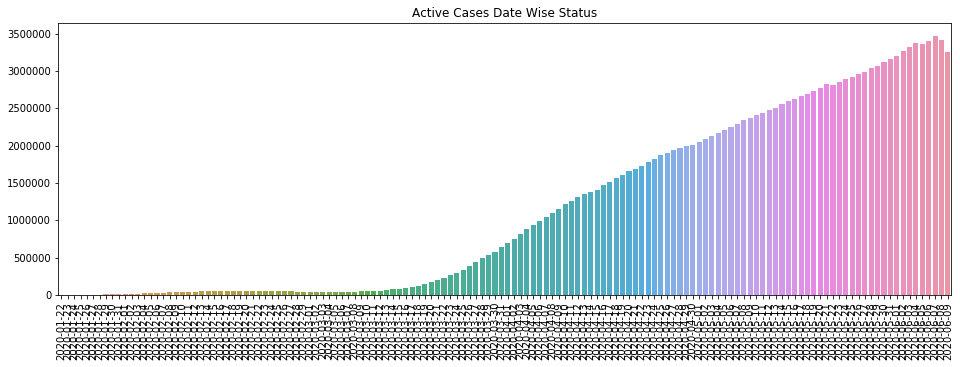

In [8]:

# Active Cases - Plotting  in Bar Plots - Wise
plt.figure(figsize=(16,5))
sns.barplot(x=datewise.index.date, y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Active Cases Date Wise Status")
plt.xticks(rotation=90)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139]),
 <a list of 140 Text xticklabel objects>)

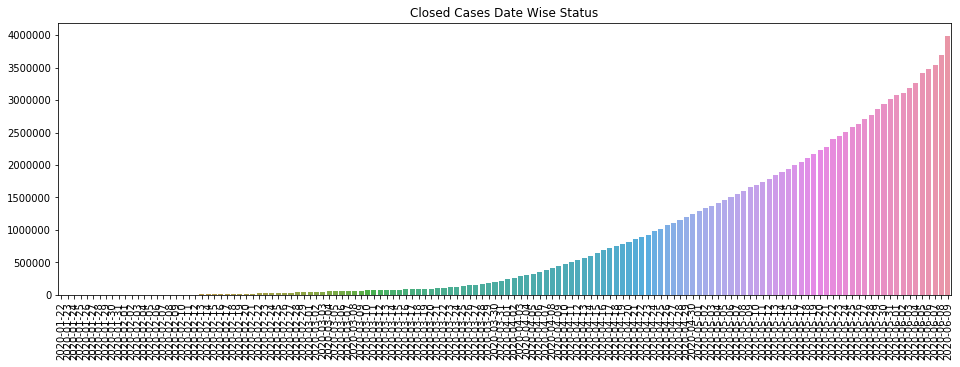

In [9]:

# Active Cases - Plotting  in Bar Plots - Day Wise
plt.figure(figsize=(16,5))
sns.barplot(x=datewise.index.date, y=datewise["Recovered"] + datewise["Deaths"])
plt.title("Closed Cases Date Wise Status")
plt.xticks(rotation=90)


                 Confirmed  Recovered  Deaths  WeekOfYear
ObservationDate                                          
2020-01-22             555         28      17           4
2020-01-23             653         30      18           4
2020-01-24             941         36      26           4
2020-01-25            1438         39      42           4
2020-01-26            2118         52      56           4


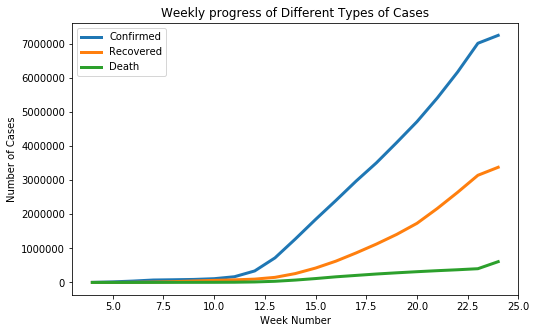

In [10]:

# Weekly Data Analysis

datewise["WeekOfYear"]=datewise.index.weekofyear

print(datewise.head())
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(i)

plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3, label='Confirmed')
plt.plot(week_num,weekwise_recovered,linewidth=3, label = 'Recovered')
plt.plot(week_num,weekwise_deaths,linewidth=3, label = 'Death')
plt.ylabel("Number of Cases")
plt.xlabel("Week Number")
plt.title("Weekly progress of Different Types of Cases")
plt.legend()


In [11]:

# Adding 4 more column to the dataset - datewise

datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

print(datewise)

                 Confirmed  Recovered  Deaths  WeekOfYear  Mortality Rate  \
ObservationDate                                                             
2020-01-22             555         28      17           4        3.063063   
2020-01-23             653         30      18           4        2.756508   
2020-01-24             941         36      26           4        2.763018   
2020-01-25            1438         39      42           4        2.920723   
2020-01-26            2118         52      56           4        2.644004   
...                    ...        ...     ...         ...             ...   
2020-06-05         6764918    3013132  395880          23        5.851956   
2020-06-06         6891213    3085833  399718          23        5.800401   
2020-06-07         7010347    3140920  402741          23        5.744951   
2020-06-08         7118471    3293408  406522          24        5.710805   
2020-06-09         7242235    3375668  609434          24        8.414999   

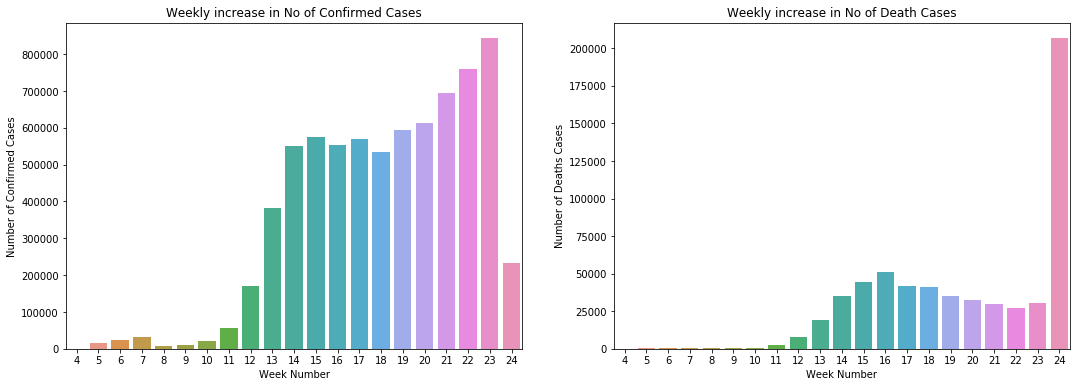

In [12]:
# Weekly Data Interpretation
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (18,6))
sns.barplot(x = week_num ,y =pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x = week_num ,y =pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Deaths Cases")
ax1.set_title("Weekly increase in No of Confirmed Cases")
ax2.set_title("Weekly increase in No of Death Cases")
plt.show()

Average Increase in Confirmed Cases :- 51726.0
Average Increase in Recovered Cases :- 24112.0
Average Increase in Confirmed Cases :- 4353.0


(array([737456., 737485., 737516., 737546., 737577.]),
 <a list of 5 Text xticklabel objects>)

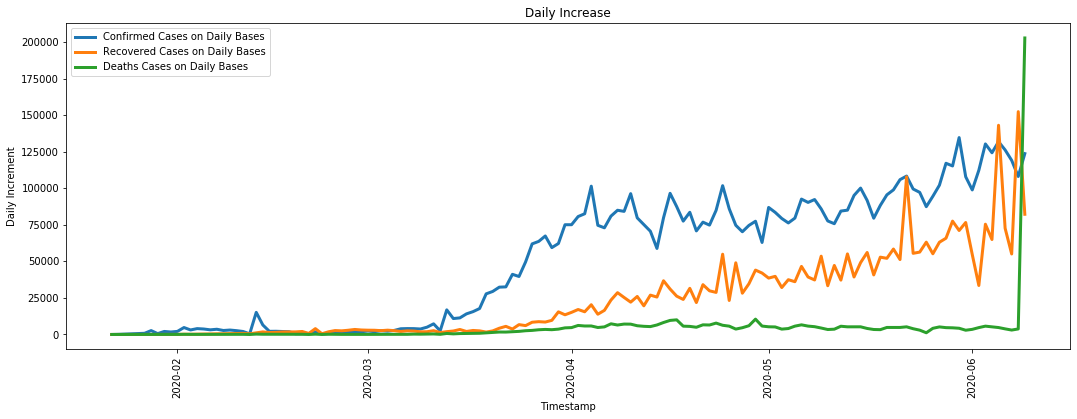

In [13]:

# Average Daily Increment Data Analysis - Confirmed Cases

print("Average Increase in Confirmed Cases :-",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average Increase in Recovered Cases :-",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average Increase in Confirmed Cases :-",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(18,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label ="Confirmed Cases on Daily Bases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label ="Recovered Cases on Daily Bases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label ="Deaths Cases on Daily Bases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily Increase")
plt.legend()
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Top 15 Countries with highest Death  Cases')

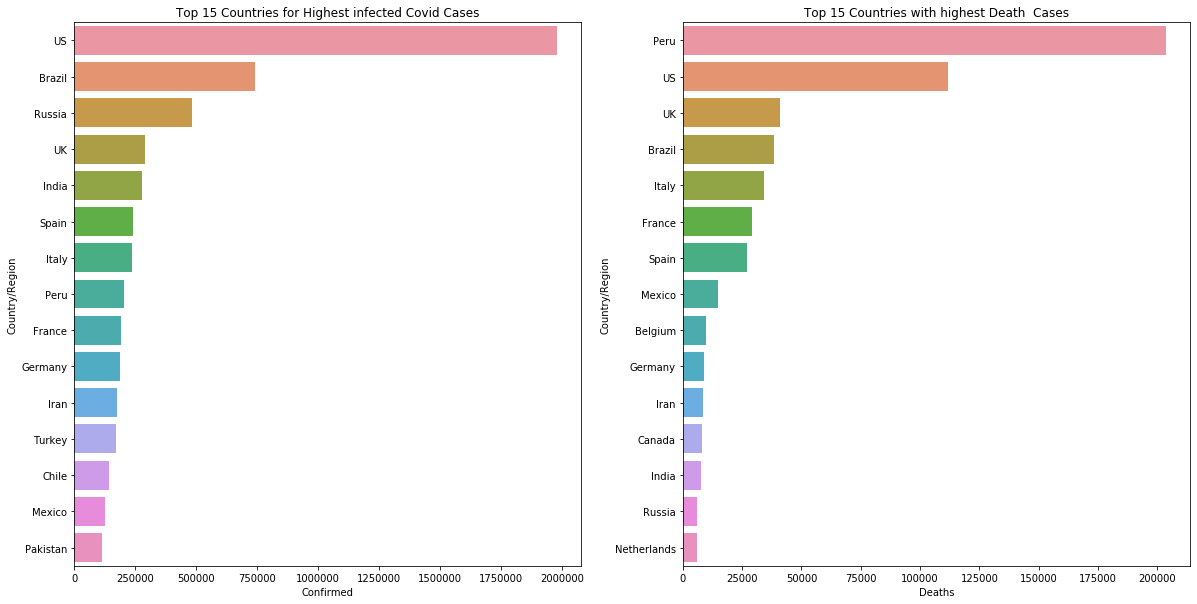

In [14]:

# Country Wise Mortality Rate ( i.e = No of Death Cases / No of Recovered Cases )

countrywise = covid[covid["ObservationDate"] == covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum", "Recovered":"sum" ,"Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"] = (countrywise["Deaths"]/countrywise["Confirmed"]) * 100
countrywise["Recovered"] = (countrywise["Recovered"]/countrywise["Confirmed"]) * 100

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending = False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending = False).head(15)

sns.barplot(x = top_15confirmed["Confirmed"] ,y = top_15confirmed.index , ax =ax1)
ax1.set_title("Top 15 Countries for Highest infected Covid Cases")

sns.barplot(x = top_15deaths["Deaths"] ,y = top_15deaths.index , ax =ax2)
ax2.set_title("Top 15 Countries with highest Death  Cases")



In [15]:

# Shape of Data

datewise["Days Since"] = datewise.index - datewise.index[0]

datewise["Days Since"] = datewise["Days Since"].dt.days
datewise.head()


,Confirmed,Recovered,Deaths,WeekOfYear,Mortality Rate,Recovery Rate,Active Cases,Closed Cases,Days Since
ObservationDate,,,,,,,,,
2020-01-22,555,28,17,4,3.063063,5.045045,510,45,0
2020-01-23,653,30,18,4,2.756508,4.594181,605,48,1
2020-01-24,941,36,26,4,2.763018,3.825717,879,62,2
2020-01-25,1438,39,42,4,2.920723,2.712100,1357,81,3
2020-01-26,2118,52,56,4,2.644004,2.455146,2010,108,4


In [17]:
# Linear Regression Model
l_r1 = LinearRegression(normalize=True)
l_r1.fit(np.array(l_s1["Days Since"]).reshape(-1,1),np.array(_s1["Confirmed"]).reshape(-1,1))
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.01)

NameError: name 'l_s1' is not defined

In [20]:
#Fitting model on the training data
svm.fit(np.array(t_s1["Days Since"]).reshape(-1,1),np.array(t_s1["Confirmed"]).reshape(-1,1))
linear_reg_predict = l_r1.predict(np.array(v_s1["Days Since"]).reshape(-1,1))
svm_predict = svm.predict(np.array(v_s1["Days Since"]).reshape(-1,1))

ndewdate=[]
newlinear_prediction=[]
newsvm_prediction=[]

for i in range(1,18):
    ndewdate.append(datewise.index[-1]+timedelta(days=i))
    newlinear_prediction.append(l_r1.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    newsvm_prediction.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

pd.set_option('display.float_format', lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(ndewdate,newlinear_prediction,newsvm_prediction),columns=["Dates","Linear Regression Prediction","SVM Prediction"])
print(model_predictions.head(5))


NameError: name 'svm' is not defined

In [21]:

# Time Series Forecasting - HOLT

model_train=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid=datewise.iloc[int(datewise.shape[0]*0.90):]
holt=Holt(np.asarray(model_train["Confirmed"]))
holt = holt.fit(smoothing_level=1.0, smoothing_slope=0.1,optimized=False)
y_pred=valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))
print("ok1")
print(y_pred.Holt)


ok1
ObservationDate
2020-05-27    5.682016e+06
2020-05-28    5.774407e+06
2020-05-29    5.866797e+06
2020-05-30    5.959187e+06
2020-05-31    6.051578e+06
2020-06-01    6.143968e+06
2020-06-02    6.236359e+06
2020-06-03    6.328749e+06
2020-06-04    6.421139e+06
2020-06-05    6.513530e+06
2020-06-06    6.605920e+06
2020-06-07    6.698310e+06
2020-06-08    6.790701e+06
2020-06-09    6.883091e+06
Name: Holt, dtype: float64


NameError: name 'model_predictions' is not defined

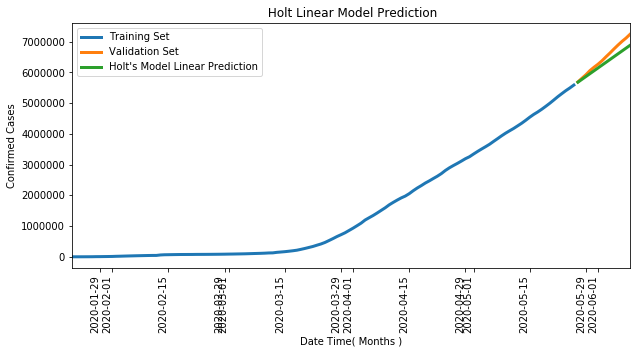

In [22]:
# Holt Model Forecast Plot

plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Training Set",linewidth=3)
valid.Confirmed.plot(label="Validation Set",linewidth=3)
y_pred.Holt.plot(label="Holt's Model Linear Prediction",linewidth=3)
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time( Months )")
plt.title(" Holt Linear Model Prediction")
plt.xticks(rotation=90)
plt.legend()

newdata_holt=[]
holt_new_prediction=[]
for i in range(1,18):
    newdata_holt.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])
model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction

print(model_predictions)


In [23]:
# Exponential Smoothining of dataset -

print(model_train)

expo_smooth = ExponentialSmoothing(np.asarray(model_train["Confirmed"]),seasonal_periods=10,trend='mul',seasonal='add').fit()

y_pred["Holt's Winter Model"]=expo_smooth.forecast(len(valid))

model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))

                 Confirmed  Recovered  Deaths  WeekOfYear  Mortality Rate  \
ObservationDate                                                             
2020-01-22             555         28      17           4        3.063063   
2020-01-23             653         30      18           4        2.756508   
2020-01-24             941         36      26           4        2.763018   
2020-01-25            1438         39      42           4        2.920723   
2020-01-26            2118         52      56           4        2.644004   
2020-01-27            2927         61      82           5        2.801503   
2020-01-28            5578        107     131           5        2.348512   
2020-01-29            6165        126     133           5        2.157340   
2020-01-30            8235        143     171           5        2.076503   
2020-01-31            9925        222     213           5        2.146096   
2020-02-01           12038        284     259           5        2.151520   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:224: RuntimeWarning: overflow encountered in double_scalars
  (alphac * (l[i - 1] * b[i - 1]**phi))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:227: RuntimeWarning: overflow encountered in double_scalars
  (gamma * (l[i - 1] * b[i - 1]**phi)) + (gammac * s[i - 1])
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:227: RuntimeWarning: invalid value encountered in double_scalars
  (gamma * (l[i - 1] * b[i - 1]**phi)) + (gammac * s[i - 1])
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:225: RuntimeWarning: invalid value encountered in double_scalars
  b[i] = (beta * (l[i] / l[i - 1])) + (betac * b[i - 1]**phi)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:228: RuntimeWarning: overflow encountered in multiply
  return sqeuclidean((l * phi * b) + s[:-(m - 1)], y)
C:\ProgramData\Anaconda3\lib\site-packages\stats

NameError: name 'model_scores' is not defined

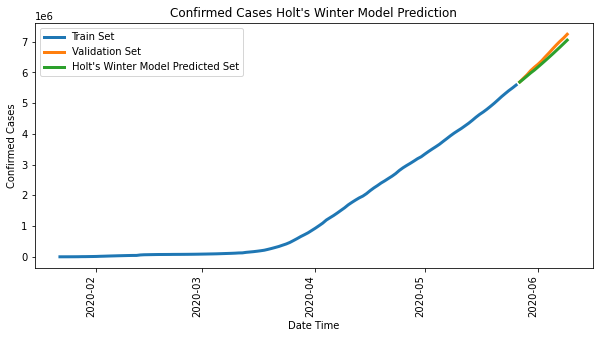

In [28]:
# Plotting
plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",linewidth=3)
valid.Confirmed.plot(label="Validation Set",linewidth=3)
y_pred["Holt's Winter Model"].plot(label="Holt's Winter Model Predicted Set",linewidth=3)
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Confirmed Cases Holt's Winter Model Prediction")
plt.xticks(rotation=90)
plt.legend()

In [35]:
# Prediction
holt_winter_new_prediction=[]
for i in range(1,18):
    holt_winter_new_prediction.append(expo_smooth.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction
model_predictions


,Dates,Linear Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2020-06-10,4567955,10681986,6975482,6385349
1,2020-06-11,4608578,11063006,7067872,6491846
2,2020-06-12,4649202,11454990,7160262,6599912
3,2020-06-13,4689826,11858172,7252653,6711266
4,2020-06-14,4730449,12272792,7345043,6822039
5,2020-06-15,4771073,12699090,7437433,6935778
6,2020-06-16,4811697,13137312,7529824,7050653
7,2020-06-17,4852321,13587706,7622214,7155984
8,2020-06-18,4892944,14050523,7714605,7272363
9,2020-06-19,4933568,14526020,7806995,7390506


In [37]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [38]:
from pmdarima.arima import auto_arima

In [39]:

model_ma = auto_arima(model_train["Confirmed"], trace=True,  error_action='ignore', start_p=0, start_q=0, max_p=0, max_q=3,suppress_warnings=True,stepwise=False, seasonal=False)
model_ma.fit(model_train["Confirmed"])


Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=2733.620, BIC=2739.371, Time=0.069 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=2730.350, BIC=2738.976, Time=0.047 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=2729.338, BIC=2740.839, Time=0.053 seconds
Fit ARIMA(0,2,3)x(0,0,0,0) [intercept=True]; AIC=2733.700, BIC=2748.076, Time=0.085 seconds
Total fit time: 0.254 seconds


ARIMA(order=(0, 2, 2), suppress_warnings=True)

In [40]:
auto_arima

<function pmdarima.arima.auto.auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept=True, sarimax_kwargs=None, **fit_args)>

In [41]:
model_ar= auto_arima(model_train["Confirmed"],
                     trace=True, 
                     error_action='ignore',
                     start_p=0,
                     start_q=0,
                     max_p=5,
                     max_q=0,
                    suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Confirmed"])
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar

Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=2733.620, BIC=2739.371, Time=0.016 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=2732.270, BIC=2740.896, Time=0.016 seconds
Fit ARIMA(2,2,0)x(0,0,0,0) [intercept=True]; AIC=2730.126, BIC=2741.627, Time=0.038 seconds
Fit ARIMA(3,2,0)x(0,0,0,0) [intercept=True]; AIC=2729.516, BIC=2743.892, Time=0.063 seconds
Fit ARIMA(4,2,0)x(0,0,0,0) [intercept=True]; AIC=2724.684, BIC=2741.935, Time=0.069 seconds
Fit ARIMA(5,2,0)x(0,0,0,0) [intercept=True]; AIC=2719.013, BIC=2739.140, Time=0.100 seconds
Total fit time: 0.316 seconds


ARIMA(order=(5, 2, 0), suppress_warnings=True)

In [44]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))
np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"]))

29819.77445714308

(array([737456., 737485., 737516., 737546., 737577.]),
 <a list of 5 Text major ticklabel objects>)

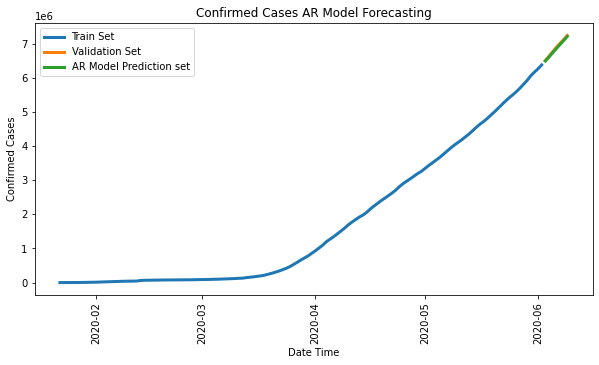

In [45]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",linewidth=3)
plt.plot(valid.index,valid["Confirmed"],
         label="Validation Set",linewidth=3)
plt.plot(y_pred["AR Model Prediction"],label="AR Model Prediction set",linewidth=3)
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases AR Model Forecasting")
plt.xticks(rotation=90)

In [46]:
AR_model_new_prediction=[]
for i in range(1,18):
    AR_model_new_prediction.append(model_ar.predict(len(valid)+i)[-1])
model_predictions["AR Model Prediction"]=AR_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction
0,2020-06-10,4567955,10681986,6975482,6385349,7331496
1,2020-06-11,4608578,11063006,7067872,6491846,7455449
2,2020-06-12,4649202,11454990,7160262,6599912,7580619
3,2020-06-13,4689826,11858172,7252653,6711266,7705766
4,2020-06-14,4730449,12272792,7345043,6822039,7831280
